In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-investments/relationships.csv
/kaggle/input/startup-investments/ipos.csv
/kaggle/input/startup-investments/milestones.csv
/kaggle/input/startup-investments/degrees.csv
/kaggle/input/startup-investments/offices.csv
/kaggle/input/startup-investments/funds.csv
/kaggle/input/startup-investments/funding_rounds.csv
/kaggle/input/startup-investments/acquisitions.csv
/kaggle/input/startup-investments/objects.csv
/kaggle/input/startup-investments/people.csv
/kaggle/input/startup-investments/investments.csv


# Startup Investments
Venture deals, organizations, people and exits.


# Exploratory Data Analysis

__Description__

The startup world is flourishing. There are hundreds of new companies being founded each day and venture capital has become a substantial asset class with yearly investments exceeding $100B in the US alone. Crunchbase 2013 Snapshot © 2013 dataset provides a glimpse into this exciting world.


__Content__

This diverse dataset contains information about the startup ecosystem: organizations, individuals, company news, funding rounds, acquisitions, and IPOs.
There are 11 tables that can be joined using unique IDs (schema to follow). More information about the individual data variables can be found on the Crunchabse Data website (under the API Entities Types section).


__Acknowledgements__

This Crunchbase 2013 Snapshot © 2013 dataset is fully attributed to Crunchbase.

__Inspiration__
There are multiple avenues for exploration:

1) EDA of the startup ecosystem.<br>
2) Tracking and analyzing investment trends over time.<br>
3) Clustering VC funds based on their existing investments.<br>
4) Predicting which startup will proceed to raise further rounds will get acquired will file for an IPO.<br>
5) Mapping the network of individuals involved in the startup ecosystem.


# Details about each csv file.

ACQUISITIONS.CSV<br>
Contains information about the startups that have been bought.

DEGREE.CSV<br>
Contains education background of the individuals involved in the startup world.

FUNDING ROUNDS.CSV<br>
CONTAIN INFORMATION ABOUT STARTUP FUNDING ROUNDS.

FUNDS.CSV<br>
Contains data on the ventures capital funds that make investments.

INVESTMENT.CSV<br>
Contains data on the type of various different investments made by venture capitalists.

IPOs.CSV<br>
Contsins data on initial public offerings.

MILESTONES.CSV<br>
Contains Significan events within the startup ecosystem

OBJECT.CSV<br>
Main file containing base information

OFFICE.CSV<br>
Contains information about startup company officers

PEOPLE.CSV<br>
Contains information of people in the startup world

RELATIONSHIP.CSV<br>
Contains relationship data that links companies to individual and their position

In [31]:
# Importing libraries for plotting

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)
sns.set(style='white')

In [32]:
#Let us deal with the objects.csv file
df_objects = pd.read_csv("../input/startup-investments/objects.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
df_objects.head(5)

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [34]:
df_objects.dtypes

id                      object
entity_type             object
entity_id                int64
parent_id               object
name                    object
normalized_name         object
permalink               object
category_code           object
status                  object
founded_at              object
closed_at               object
domain                  object
homepage_url            object
twitter_username        object
logo_url                object
logo_width               int64
logo_height              int64
short_description       object
description             object
overview                object
tag_list                object
country_code            object
state_code              object
city                    object
region                  object
first_investment_at     object
last_investment_at      object
investment_rounds        int64
invested_companies       int64
first_funding_at        object
last_funding_at         object
funding_rounds           int64
funding_

In [35]:
# So we have object,int and flaot datatypes

df_objects.describe(include='all')

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
count,462651,462651,462651.000000,27715,462649,462620,462651,123186,462651,100441,...,31507,462651.000000,4.626510e+05,100358,100358,462651.000000,462651.000000,339486,462591,462651
unique,462651,4,NaN,11972,445204,439326,462435,42,9,6323,...,2978,NaN,NaN,4225,4029,NaN,NaN,80505,337606,383541
top,c:151014,Person,NaN,c:2728,Bob Hebig,bob hebig,/person/bob-hebig-4,software,operating,2011-01-01,...,2012-01-01,NaN,NaN,2010-01-01,2012-01-01,NaN,NaN,dhawalarco,2008-02-05 22:41:40,2008-02-05 22:45:37
freq,1,226708,NaN,152,40,40,19,17922,443663,3937,...,272,NaN,NaN,3240,3023,NaN,NaN,15162,41,81
mean,NaN,NaN,132915.761775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.113749,8.926722e+05,NaN,NaN,0.265196,1.794305,NaN,NaN,NaN
std,NaN,NaN,88768.946816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.524229,1.700120e+07,NaN,NaN,0.568577,5.456711,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,45249.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,NaN,143072.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,213868.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000e+00,NaN,NaN,0.000000,2.000000,NaN,NaN,NaN


* 	We have details of about 462651 funding deals in this data


In [36]:
df_objects.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [37]:
df_objects['entity_type'].value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

In [38]:
df_objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

In [39]:
# Rename id in objects.csv to funded_object_id
df_objects.rename(columns={'id':'funded_object_id'}, inplace=True)
df_objects.head()

,funded_object_id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [40]:
# Printing the Information regarding dataset

print("Info",df_objects.info())

# No of rows and columns in Dataset
print('\n\nThe dataset contains {} rows and {} columns'.format(df_objects.shape[0],df_objects.shape[1]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_object_id     462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462649 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [41]:

# check for missing data in the  data
df_objects.isnull().sum()

funded_object_id            0
entity_type                 0
entity_id                   0
parent_id              434936
name                        2
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

In [42]:
#lets check percentange of missing value
missing_value_train=pd.DataFrame(data=df_objects.isnull().sum()/len(df_objects)*100,index=df_objects.columns,columns=['missing%'])
missing_value_train.sort_values(by='missing%',ascending=False, inplace=True)
missing_value_train[missing_value_train['missing%'] >0]

,missing%
closed_at,99.392847
short_description,98.353619
last_investment_at,96.335034
first_investment_at,96.335034
parent_id,94.009523
last_funding_at,93.189899
first_funding_at,93.189899
state_code,88.163864
city,80.399048
description,79.465083


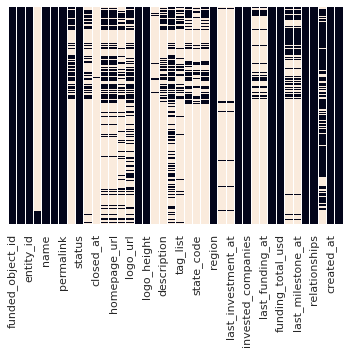

In [43]:
sns.heatmap(df_objects.isnull(),yticklabels=False,cbar=False)

In [44]:
# Dropping null values
df_objects.drop(["created_at","updated_at", "logo_url", "logo_width","overview", "entity_id","parent_id","normalized_name", "logo_height","short_description", "created_at", "updated_at", "twitter_username","relationships", "domain", "homepage_url", "overview", "tag_list","city", "region", "state_code"], axis="columns", inplace=True)
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_object_id     462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   name                 462649 non-null  object 
 3   permalink            462651 non-null  object 
 4   category_code        123186 non-null  object 
 5   status               462651 non-null  object 
 6   founded_at           100441 non-null  object 
 7   closed_at            2809 non-null    object 
 8   description          95005 non-null   object 
 9   country_code         95043 non-null   object 
 10  first_investment_at  16956 non-null   object 
 11  last_investment_at   16956 non-null   object 
 12  investment_rounds    462651 non-null  int64  
 13  invested_companies   462651 non-null  int64  
 14  first_funding_at     31507 non-null   object 
 15  last_funding_at  

In [45]:
df_objects['category_code'].value_counts()

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

In [46]:
df_objects['country_code'].value_counts()

USA    55584
GBR     7957
IND     4057
CAN     4005
DEU     2157
       ...  
GIN        1
WSM        1
LSO        1
PCN        1
GRD        1
Name: country_code, Length: 177, dtype: int64

In [47]:
df_objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

So these are the categories of startups.

In [48]:
df_objects['country_code'].value_counts()

USA    55584
GBR     7957
IND     4057
CAN     4005
DEU     2157
       ...  
GIN        1
WSM        1
LSO        1
PCN        1
GRD        1
Name: country_code, Length: 177, dtype: int64

In [51]:
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_object_id     462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   name                 462649 non-null  object 
 3   permalink            462651 non-null  object 
 4   category_code        123186 non-null  object 
 5   status               462651 non-null  object 
 6   founded_at           100441 non-null  object 
 7   closed_at            2809 non-null    object 
 8   description          95005 non-null   object 
 9   country_code         95043 non-null   object 
 10  first_investment_at  16956 non-null   object 
 11  last_investment_at   16956 non-null   object 
 12  investment_rounds    462651 non-null  int64  
 13  invested_companies   462651 non-null  int64  
 14  first_funding_at     31507 non-null   object 
 15  last_funding_at  

In [52]:
investments = pd.read_csv("../input/startup-investments/investments.csv")
investments.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [53]:
investments['funded_object_id'].value_counts()

c:169876    58
c:28535     58
c:32499     54
c:6460      53
c:16284     49
            ..
c:51681      1
c:238209     1
c:28490      1
c:32023      1
c:178861     1
Name: funded_object_id, Length: 21607, dtype: int64

In [54]:
# Loading and merging the required dataset

df = investments.merge(df_objects, on='funded_object_id')
df.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at,entity_type,name,permalink,category_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
2,144,85,c:4,f:1,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
3,145,85,c:4,f:2,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer
4,146,85,c:4,f:4850,2007-07-04 04:56:09,2008-02-27 23:14:29,Company,Digg,/company/digg,news,...,0,0,2005-10-01,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80570 entries, 0 to 80569
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   80570 non-null  int64  
 1   funding_round_id     80570 non-null  int64  
 2   funded_object_id     80570 non-null  object 
 3   investor_object_id   80570 non-null  object 
 4   created_at           80570 non-null  object 
 5   updated_at           80570 non-null  object 
 6   entity_type          80570 non-null  object 
 7   name                 80570 non-null  object 
 8   permalink            80570 non-null  object 
 9   category_code        78704 non-null  object 
 10  status               80570 non-null  object 
 11  founded_at           68590 non-null  object 
 12  closed_at            4014 non-null   object 
 13  description          58321 non-null  object 
 14  country_code         77875 non-null  object 
 15  first_investment_at  921 non-null   

In [57]:
df['status'].value_counts()

operating    63268
acquired     11594
closed        3894
ipo           1814
Name: status, dtype: int64

In [58]:
df.drop(["closed_at", "first_investment_at","invested_companies", "investment_rounds", "created_at", "updated_at"], axis="columns", inplace= True)

In [59]:
df.tail()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,...,country_code,last_investment_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by
80565,80891,57805,c:285592,p:189455,Company,Chippmunk,/company/chippmunk,ecommerce,operating,2013-09-19,...,USA,NaN,2013-12-11,2013-12-11,1,750000.0,2013-09-19,2013-09-19,1,chippmunk
80566,80899,57912,c:60389,p:268570,Company,ROCKETHOME,/company/rockethome,cleantech,operating,2010-06-01,...,DEU,NaN,2013-07-10,2013-07-10,1,0.0,2013-04-01,2013-07-10,2,NaN
80567,80900,57929,c:286183,p:365,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013
80568,80901,57929,c:286183,p:176466,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013
80569,80902,57929,c:286183,p:268577,Company,Wedding Spot,/company/wedding-spot,web,operating,2013-05-01,...,USA,NaN,2013-12-12,2013-12-12,1,225000.0,NaN,NaN,0,ramesh2013


In [61]:
funding_rounds = pd.read_csv("../input/startup-investments/funding_rounds.csv")
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [63]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52928 non-null  int64  
 1   funding_round_id          52928 non-null  int64  
 2   object_id                 52928 non-null  object 
 3   funded_at                 52680 non-null  object 
 4   funding_round_type        52928 non-null  object 
 5   funding_round_code        52928 non-null  object 
 6   raised_amount_usd         52928 non-null  float64
 7   raised_amount             52928 non-null  float64
 8   raised_currency_code      49862 non-null  object 
 9   pre_money_valuation_usd   52928 non-null  float64
 10  pre_money_valuation       52928 non-null  float64
 11  pre_money_currency_code   26883 non-null  object 
 12  post_money_valuation_usd  52928 non-null  float64
 13  post_money_valuation      52928 non-null  float64
 14  post_m

In [64]:
funding_rounds.drop(['id', 'funding_round_id', 'funding_round_code', 'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd', 'pre_money_valuation', 'pre_money_currency_code', 'post_money_valuation_usd', 'post_money_currency_code', 'participants', 'is_first_round', 'is_last_round', 'source_url', 'source_description', 'created_by', 'updated_at', 'created_at'], axis='columns', inplace=True)

In [65]:
funding_rounds.drop(['post_money_valuation'], axis='columns', inplace=True)

In [66]:
funding_rounds.head()

,object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [67]:
funding_rounds.rename(columns={'object_id':'funded_object_id'}, inplace=True)
funding_rounds.head()

,funded_object_id,funded_at,funding_round_type,raised_amount_usd
0,c:4,2006-12-01,series-b,8500000.0
1,c:5,2004-09-01,angel,500000.0
2,c:5,2005-05-01,series-a,12700000.0
3,c:5,2006-04-01,series-b,27500000.0
4,c:7299,2006-05-01,series-b,10500000.0


In [70]:
df_new = df.merge(funding_rounds, on='funded_object_id')
df_new.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,created_by,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,...,2011-07-12,4,45000000.0,2010-01-08,2013-12-04,8,initial-importer,2006-12-01,series-b,8500000.0


In [71]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223898 entries, 0 to 223897
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  223898 non-null  int64  
 1   funding_round_id    223898 non-null  int64  
 2   funded_object_id    223898 non-null  object 
 3   investor_object_id  223898 non-null  object 
 4   entity_type         223898 non-null  object 
 5   name                223898 non-null  object 
 6   permalink           223898 non-null  object 
 7   category_code       221193 non-null  object 
 8   status              223898 non-null  object 
 9   founded_at          202601 non-null  object 
 10  description         175292 non-null  object 
 11  country_code        220161 non-null  object 
 12  last_investment_at  3185 non-null    object 
 13  first_funding_at    223811 non-null  object 
 14  last_funding_at     223811 non-null  object 
 15  funding_rounds      223898 non-nul

In [72]:
# Length of new dataframe

len(df_new)

223898

In [73]:
# Checking for null values in  new dataframe created

df_new.isnull().sum()

id                         0
funding_round_id           0
funded_object_id           0
investor_object_id         0
entity_type                0
name                       0
permalink                  0
category_code           2705
status                     0
founded_at             21297
description            48606
country_code            3737
last_investment_at    220713
first_funding_at          87
last_funding_at           87
funding_rounds             0
funding_total_usd          0
first_milestone_at     41500
last_milestone_at      41500
milestones                 0
created_by             36454
funded_at                229
funding_round_type         0
raised_amount_usd          0
dtype: int64

In [74]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df_new.isnull().sum()/len(df_new.index)), 2)

id                     0.00
funding_round_id       0.00
funded_object_id       0.00
investor_object_id     0.00
entity_type            0.00
name                   0.00
permalink              0.00
category_code          1.21
status                 0.00
founded_at             9.51
description           21.71
country_code           1.67
last_investment_at    98.58
first_funding_at       0.04
last_funding_at        0.04
funding_rounds         0.00
funding_total_usd      0.00
first_milestone_at    18.54
last_milestone_at     18.54
milestones             0.00
created_by            16.28
funded_at              0.10
funding_round_type     0.00
raised_amount_usd      0.00
dtype: float64

In [75]:
df_new.drop(['created_by', 'first_milestone_at', 'last_milestone_at', 'last_investment_at'], axis='columns', inplace=True)

In [76]:
df_new.head()

,id,funding_round_id,funded_object_id,investor_object_id,entity_type,name,permalink,category_code,status,founded_at,description,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,funded_at,funding_round_type,raised_amount_usd
0,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0
1,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2005-10-01,series-a,2800000.0
2,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2008-09-24,series-c+,28700000.0
3,1,1,c:4,f:1,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2011-07-12,series-c+,5000000.0
4,2,1,c:4,f:2,Company,Digg,/company/digg,news,acquired,2004-10-11,user driven social content website,USA,2005-10-01,2011-07-12,4,45000000.0,8,2006-12-01,series-b,8500000.0


In [77]:
df_new['category_code'].value_counts()

software            28216
biotech             24386
enterprise          18361
mobile              17528
web                 16203
advertising         13320
ecommerce           10960
cleantech            9866
analytics            7642
games_video          7439
semiconductor        7249
hardware             6989
medical              6169
network_hosting      4718
social               4226
finance              4173
security             3908
education            2991
health               2552
search               2462
messaging            1936
other                1816
public_relations     1703
news                 1682
manufacturing        1604
fashion              1496
travel               1411
music                1384
nanotech             1277
hospitality          1229
automotive            997
consulting            973
transportation        928
photo_video           881
real_estate           800
sports                477
nonprofit             357
design                296
legal       

In [78]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df_new.isnull().sum()/len(df_new.index)), 2)

id                     0.00
funding_round_id       0.00
funded_object_id       0.00
investor_object_id     0.00
entity_type            0.00
name                   0.00
permalink              0.00
category_code          1.21
status                 0.00
founded_at             9.51
description           21.71
country_code           1.67
first_funding_at       0.04
last_funding_at        0.04
funding_rounds         0.00
funding_total_usd      0.00
milestones             0.00
funded_at              0.10
funding_round_type     0.00
raised_amount_usd      0.00
dtype: float64

In [79]:
#Dropping rows based on null columns
df_new = df_new[~(df_new['country_code'].isnull() | df_new['description'].isnull() | df_new['funded_at'].isnull() | df_new['founded_at'].isnull())]

In [81]:
df_new.isna().sum()

id                      0
funding_round_id        0
funded_object_id        0
investor_object_id      0
entity_type             0
name                    0
permalink               0
category_code         269
status                  0
founded_at              0
description             0
country_code            0
first_funding_at        0
last_funding_at         0
funding_rounds          0
funding_total_usd       0
milestones              0
funded_at               0
funding_round_type      0
raised_amount_usd       0
dtype: int64

In [82]:
# Removing null values

df_new = df_new[~(df_new['category_code'].isnull())]

In [83]:
df_new.isna().sum()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
entity_type           0
name                  0
permalink             0
category_code         0
status                0
founded_at            0
description           0
country_code          0
first_funding_at      0
last_funding_at       0
funding_rounds        0
funding_total_usd     0
milestones            0
funded_at             0
funding_round_type    0
raised_amount_usd     0
dtype: int64

In [84]:
df_new['status'].value_counts()

operating    128167
acquired      23269
ipo            6943
closed         4878
Name: status, dtype: int64

In [85]:
#Identify duplicates records in the data
dupes=df_new.duplicated()
sum(dupes)

291

In [86]:
df_new =df_new.drop_duplicates()

In [87]:
#Identify duplicates records in the data
dupes2=df_new.duplicated()
sum(dupes2)

0

In [88]:
# EDA of acquisitions.csv

acquisitions = pd.read_csv("../input/startup-investments/acquisitions.csv")
acquisitions.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [89]:
acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9562 non-null   int64  
 1   acquisition_id       9562 non-null   int64  
 2   acquiring_object_id  9562 non-null   object 
 3   acquired_object_id   9561 non-null   object 
 4   term_code            1906 non-null   object 
 5   price_amount         9562 non-null   float64
 6   price_currency_code  9558 non-null   object 
 7   acquired_at          9533 non-null   object 
 8   source_url           8566 non-null   object 
 9   source_description   8590 non-null   object 
 10  created_at           9562 non-null   object 
 11  updated_at           9562 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 896.6+ KB


In [90]:
acquisitions['acquiring_object_id'].value_counts()

c:28        159
c:59        133
c:1242      129
c:3246      115
c:29         98
           ... 
c:269414      1
c:150592      1
c:13745       1
c:33676       1
c:203943      1
Name: acquiring_object_id, Length: 4872, dtype: int64

In [94]:
len(acquisitions)

9562

In [95]:
acquisitions.isnull().sum()

id                        0
acquisition_id            0
acquiring_object_id       0
acquired_object_id        1
term_code              7656
price_amount              0
price_currency_code       4
acquired_at              29
source_url              996
source_description      972
created_at                0
updated_at                0
dtype: int64

In [96]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(acquisitions.isnull().sum()/len(acquisitions.index)), 2)

id                      0.00
acquisition_id          0.00
acquiring_object_id     0.00
acquired_object_id      0.01
term_code              80.07
price_amount            0.00
price_currency_code     0.04
acquired_at             0.30
source_url             10.42
source_description     10.17
created_at              0.00
updated_at              0.00
dtype: float64

In [97]:
acquisitions.drop(['term_code', 'source_url', 'source_description'], axis='columns', inplace=True)

In [98]:
acquisitions.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,price_amount,price_currency_code,acquired_at,created_at,updated_at
0,1,1,c:11,c:10,20000000.0,USD,2007-05-30,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,60000000.0,USD,2007-07-01,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,280000000.0,USD,2007-05-01,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,100000000.0,USD,2007-06-01,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,25000000.0,USD,2007-07-01,2007-07-20 05:29:07,2008-02-25 00:23:47


In [99]:
acquisitions.isnull().sum()

id                      0
acquisition_id          0
acquiring_object_id     0
acquired_object_id      1
price_amount            0
price_currency_code     4
acquired_at            29
created_at              0
updated_at              0
dtype: int64

In [100]:
# Dropping rows based on null columns
acquisitions = acquisitions[~(acquisitions['acquired_at'].isnull() | acquisitions['price_currency_code'].isnull() | acquisitions['price_currency_code'].isnull() | acquisitions['acquired_object_id'].isnull())]

In [101]:
acquisitions.isnull().sum()

id                     0
acquisition_id         0
acquiring_object_id    0
acquired_object_id     0
price_amount           0
price_currency_code    0
acquired_at            0
created_at             0
updated_at             0
dtype: int64

So now we don't have any null values.

In [102]:
#Identify duplicates records in the data
dupes=acquisitions.duplicated()
sum(dupes)

0

So we have no duplicate values.

In [104]:
# EDA of funds.csv

funds =  pd.read_csv("../input/startup-investments/funds.csv")
funds.head()

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


In [105]:
funds.head()

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


In [106]:
funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1564 non-null   int64  
 1   fund_id               1564 non-null   int64  
 2   object_id             1564 non-null   object 
 3   name                  1564 non-null   object 
 4   funded_at             1449 non-null   object 
 5   raised_amount         1564 non-null   float64
 6   raised_currency_code  1564 non-null   object 
 7   source_url            1272 non-null   object 
 8   source_description    1218 non-null   object 
 9   created_at            1564 non-null   object 
 10  updated_at            1564 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 134.5+ KB


In [107]:
len(funds)

1564

In [108]:
funds.isnull().sum()

id                        0
fund_id                   0
object_id                 0
name                      0
funded_at               115
raised_amount             0
raised_currency_code      0
source_url              292
source_description      346
created_at                0
updated_at                0
dtype: int64

In [110]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(funds.isnull().sum()/len(funds.index)), 2)

id                       0.00
fund_id                  0.00
object_id                0.00
name                     0.00
funded_at                7.35
raised_amount            0.00
raised_currency_code     0.00
source_url              18.67
source_description      22.12
created_at               0.00
updated_at               0.00
dtype: float64

In [111]:
funds.drop(['source_description', 'source_url', 'funded_at'], axis='columns', inplace=True)

In [112]:
funds.head()

,id,fund_id,object_id,name,raised_amount,raised_currency_code,created_at,updated_at
0,1,1,f:371,Second Fund,300000000.0,USD,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,200750000.0,USD,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,650000000.0,USD,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,625000000.0,USD,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,200000000.0,USD,2009-01-03 09:51:58,2013-09-03 16:34:54


In [113]:
# Check in percentage the missing data
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(funds.isnull().sum()/len(funds.index)), 2)

id                      0.0
fund_id                 0.0
object_id               0.0
name                    0.0
raised_amount           0.0
raised_currency_code    0.0
created_at              0.0
updated_at              0.0
dtype: float64

So now we don't have any null values.

In [114]:
#Identify duplicates records in the data
dupes=funds.duplicated()
sum(dupes)

0

So we don't have any duplicate values.